## Housing data

Predictors:
```
 1. CRIM     per capita crime rate by town
 2. ZN       proportion of residential land zoned for lots over 
             25,000 sq.ft.
 3. INDUS    proportion of non-retail business acres per town
 4. CHAS     Charles River dummy variable (= 1 if tract bounds 
             river; 0 otherwise)
 5. NOX      nitric oxides concentration (parts per 10 million)
 6. RM       average number of rooms per dwelling
 7. AGE      proportion of owner-occupied units built prior to 1940
 8. DIS      weighted distances to five Boston employment centres
 9. RAD      index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
```

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## OLS via scikit-learn

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values # All except MEDV
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [4]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Residual plot

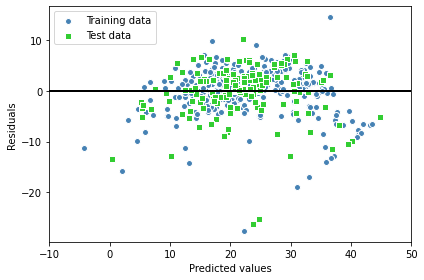

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

#### Performance metrics

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


In [7]:
# Root mean squared error is on the scale of the target, 
# i.e. it has the same interpretation advantage over MSE
# as standard deviation has over variance.
import numpy as np

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))

RMSE train: 4.467, test: 5.215


## Regularized regression

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5)    # Try me! (Differrent from C parameter!)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.          0.04348067 -0.          0.          0.          0.
  0.03405137 -0.          0.         -0.00977287 -0.          0.00450747
 -0.74609111]


In [17]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 35.737, test: 39.879
RMSE train: 5.978, test: 6.315
R^2 train: 0.578, test: 0.521


#### Excercise
Make a validation curve for the above problem, varying alpha logarithmically from 10^-5, to 10^2 in 8 steps (steal and adapt!).

In [ ]:
#
#

Ridge regression:

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # (Differrent from C parameter!)
ridge.fit(X,y)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01]


Elastic net

In [25]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [26]:
from sklearn.model_selection import GridSearchCV
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
param_range2 = [0.00001, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0] # Exact zero gives warning
param_grid = [{'alpha': param_range, 'l1_ratio': param_range2}]

gs = GridSearchCV(estimator=elanet, 
                  param_grid=param_grid, 
                  scoring='r2', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7144173783583854
{'alpha': 0.001, 'l1_ratio': 0.5}


#### Visualize grid search

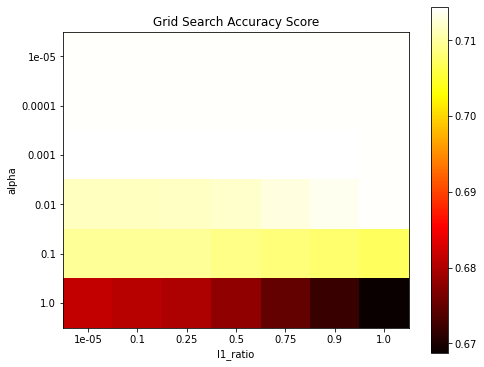

In [27]:
import matplotlib.pyplot as plt
import numpy as np
#scores = gs.cv_results_['mean_test_score'][len(param_range):].reshape(len(param_range),len(param_range2))
scores = gs.cv_results_['mean_test_score'].reshape(len(param_range),len(param_range2))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.colorbar()
plt.xticks(np.arange(len(param_range2)), param_range2)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Grid Search Accuracy Score')
plt.show()

Back to presentation

### Polynomial regression

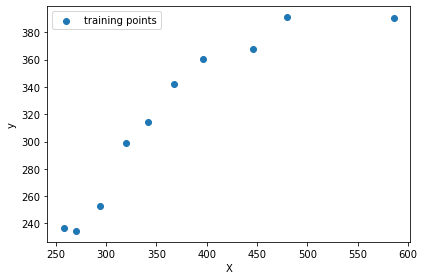

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define raw data and plot them
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

plt.scatter(X, y, label='training points')
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()

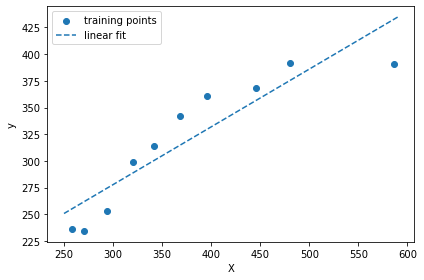

In [29]:
# Linear fit
lr = LinearRegression()
lr.fit(X, y)

# Artificial sample vector for plotting
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(include_bias=False,degree=2) # X and X**2
X_quad = quadratic.fit_transform(X)
print(X_quad)

[[2.58000e+02 6.65640e+04]
 [2.70000e+02 7.29000e+04]
 [2.94000e+02 8.64360e+04]
 [3.20000e+02 1.02400e+05]
 [3.42000e+02 1.16964e+05]
 [3.68000e+02 1.35424e+05]
 [3.96000e+02 1.56816e+05]
 [4.46000e+02 1.98916e+05]
 [4.80000e+02 2.30400e+05]
 [5.86000e+02 3.43396e+05]]


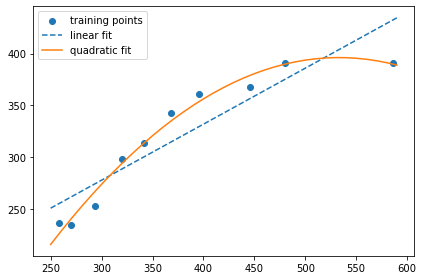

In [31]:
# Linear fit
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
# Model fit
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


#### Modeling nonlinear relationships in the Housing Dataset

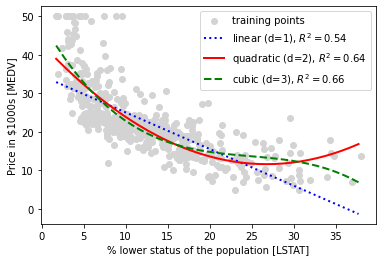

In [33]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic     = PolynomialFeatures(degree=3)
X_quad  = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Artificial sample vector for plotting
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# Fit features
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# Plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

#### Transforming the target
Log transforms often describe statistical/natural phenomena better than polynomials, especially when variation is highly scale dependent. Experience has shown that square root transformation of the response/target is often a good companion to log(X).

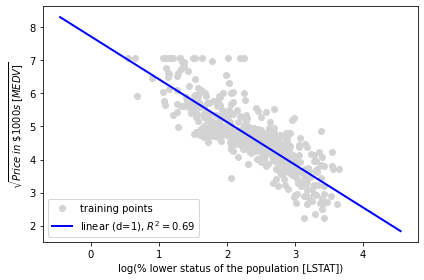

In [34]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# Transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# Fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# Plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')     # LaTeX formatting of axis label
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [35]:
original_r2 = r2_score(y, regr.predict(X_log)**2) # Both (re-)transformations are present here!
print("Re-transformed R2=%.2f" % original_r2)

Re-transformed R2=0.67


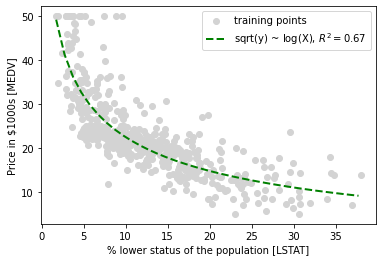

In [36]:
# Plot results in original domain
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_log_fit = np.log(X_fit)
regr  = regr.fit(X_log, y_sqrt)
y_log_fit = regr.predict(X_log_fit)**2

plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_log_fit, 
         label='sqrt(y) ~ log(X), $R^2=%.2f$' % original_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

The above transformations are independent of the training data, so prediction of new data only needs the transformation function, the model and re-transformation function of the prediction.

Back to presentation

### Decision tree regression

In [37]:
def lin_regplot(X, y, model, ax):
    ax.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    ax.plot(X, model.predict(X), color='black', lw=2)    
    return

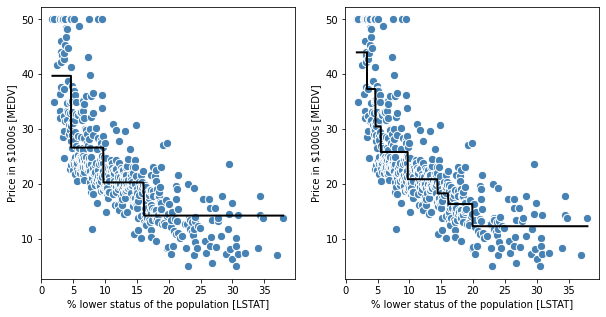

In [41]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree1 = DecisionTreeRegressor(max_depth=2)  # Try me, e.g. from 1 to 100!
tree1.fit(X, y)
tree2 = DecisionTreeRegressor(max_depth=3)  # Try me, e.g. from 1 to 100!
tree2.fit(X, y)

sort_idx = X.flatten().argsort()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
lin_regplot(X[sort_idx], y[sort_idx], tree1, ax1)
ax1.set_xlabel('% lower status of the population [LSTAT]')
ax1.set_ylabel('Price in $1000s [MEDV]')
lin_regplot(X[sort_idx], y[sort_idx], tree2, ax2)
ax2.set_xlabel('% lower status of the population [LSTAT]')
ax2.set_ylabel('Price in $1000s [MEDV]')
plt.show()

Splits are vertical lines on the LSTAT feature. Mean target values in left/right nodes are vertical lines.

Back to presentation

### Random forest regression

In [42]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', # Used to be: 'mse'
                               random_state=1,
#                               max_depth=10,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


### Residual plot

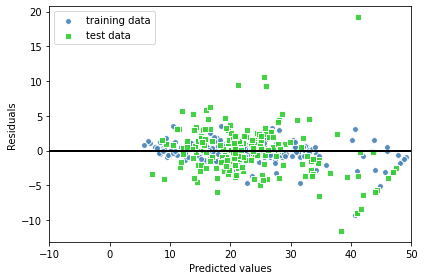

In [44]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

### Single feature Random Forest
Can you spot possible overfit below?

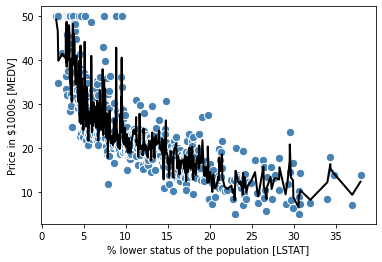

In [45]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='squared_error',
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X, y)

lin_regplot(X[sort_idx], y[sort_idx], forest, plt)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

Back to presentation

## More chemometrics
How do the methods presented in Regression perform on wide data?

In [ ]:
# Gasoline data
# Regression, okay
# PLS, okay
# Regularization
# Transformation
# Regression tree
# Random forests

In [ ]:
import scipy.io
gasoline = scipy.io.loadmat('gasoline.mat')
# loadmat() converts data file to dictionary
gasoline.keys()

In [ ]:
import matplotlib.pyplot as plt
wavelength = np.linspace(900, 1700, int((1700-900)/2+1))
plt.plot(wavelength,gasoline['NIR'].T)
plt.xlabel('Wavelength [nm]')
# plt.xlabel('Raman shift [cm-1]') # If these were Raman spectra
plt.ylabel('Intensity')
plt.show()

In [ ]:
import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(9,9))
corr = np.corrcoef(gasoline['NIR'].T)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)